In [ ]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")
print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [ ]:
!pip install --upgrade numpy scipy
!pip install --upgrade --force-reinstall scikit-learn pandas matplotlib seaborn xgboost lightgbm catboost
import numpy
import scipy
import sklearn

print("NumPy version:", numpy.__version__)
print("SciPy version:", scipy.__version__)
print("scikit-learn version:", sklearn.__version__)


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB

NumPy version: 1.26.4
SciPy version: 1.15.2
scikit-learn version: 1.6.1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv(f"{path}/Churn_Modelling.csv")

# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

# Define features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{name}: Accuracy = {accuracy:.4f}")


Logistic Regression: Accuracy = 0.8155
Random Forest: Accuracy = 0.8645
Gradient Boosting: Accuracy = 0.8660
XGBoost: Accuracy = 0.8555
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:04:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: Accuracy = 0.8655
CatBoost: Accuracy = 0.8670


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy: 0.861499636251395


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


Confusion Matrix:
 [[1563   44]
 [ 225  168]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.79      0.43      0.56       393

    accuracy                           0.87      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.87      0.85      2000


AUC-ROC Score: 0.8628820158625352


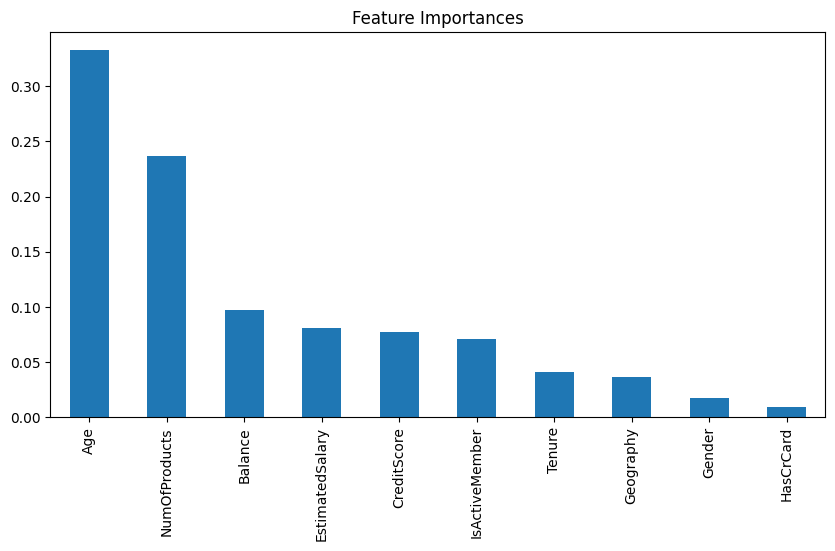

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importances")
plt.show()


In [ ]:
import joblib

# Save model
joblib.dump(best_model, "bank_churn_model.pkl")

# Load model
model = joblib.load("bank_churn_model.pkl")
model


RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)